In [56]:
import pandas as pd

def train_test_split():
    lp_20ips_2016 = pd.read_csv("LoadProfile_20IPs_2016.csv", sep=";", skiprows=1)
    lp_30ips_2017 = pd.read_csv("LoadProfile_30IPs_2017.csv", sep=";", skiprows=1)

    lp_20ips_2016["Time stamp"] = lp_20ips_2016["Time stamp"].str.replace(r'[^0-9.: ]', '', regex=True).str.strip()
    lp_20ips_2016["Time stamp"] = pd.to_datetime(lp_20ips_2016.loc[:, "Time stamp"], format='%d.%m.%Y %H:%M:%S')

    lp_30ips_2017["Time stamp"] = lp_30ips_2017["Time stamp"].str.replace(r'[^0-9.: ]', '', regex=True).str.strip()
    lp_30ips_2017["Time stamp"] = pd.to_datetime(lp_30ips_2017.loc[:, "Time stamp"], format='%d.%m.%Y %H:%M:%S')

    train_2016_full = lp_20ips_2016.iloc[:, :-7]
    train_2017_full = lp_30ips_2017.iloc[:, :-8]
    test_2016_full = pd.concat([lp_20ips_2016["Time stamp"], lp_20ips_2016.iloc[:, -7:] ], axis=1)
    test_2017_full = pd.concat([lp_30ips_2017["Time stamp"], lp_30ips_2017.iloc[:, -8:] ], axis=1)

    train_2016_training_data = train_2016_full[train_2016_full["Time stamp"].dt.month <= 8]
    train_2016_val_data = train_2016_full[train_2016_full["Time stamp"].dt.month > 8]

    test_2016_training_data = test_2016_full[test_2016_full["Time stamp"].dt.month <= 8]
    test_2016_test_data = test_2016_full[test_2016_full["Time stamp"].dt.month > 8]

    train_2017_training_data = train_2017_full[train_2017_full["Time stamp"].dt.month <= 8]
    train_2017_val_data = train_2017_full[train_2017_full["Time stamp"].dt.month > 8]

    test_2017_training_data = test_2017_full[test_2017_full["Time stamp"].dt.month <= 8]
    test_2017_test_data = test_2017_full[test_2017_full["Time stamp"].dt.month > 8]

    train_2016_training_data.to_csv("tune/2016_train.csv", index=False)
    train_2016_val_data.to_csv("tune/2016_val.csv", index=False)
    test_2016_training_data.to_csv("test/2016_train.csv", index=False)
    test_2016_test_data.to_csv("test/2016_test.csv", index=False)

    train_2017_training_data.to_csv("tune/2017_train.csv", index=False)
    train_2017_val_data.to_csv("tune/2017_val.csv", index=False)
    test_2017_training_data.to_csv("test/2017_train.csv", index=False)
    test_2017_test_data.to_csv("test/2017_test.csv", index=False)

In [28]:
train_test_split()

In [64]:


train_data, val_data = load_data(2016, 1)

In [66]:
from abc import ABC, abstractmethod

class Forecaster(ABC):
    def __init__(self, year: int, ig: int):
        self.train_data, self.val_data = self.load_data(year, ig)

    @staticmethod
    def load_data(year: int, ig: int) -> tuple[pd.DataFrame, pd.DataFrame]:
        if year == 2017:
            ig_str = f"LG {ig:02d}"
        else:
            ig_str = f"LG {ig:01d}"

        train = pd.read_csv(f"tune/{year}_train.csv")
        train_data = train[["Time stamp", ig_str]]
        train_data.loc[:, ig_str] = train_data[ig_str].astype(float)
        train_data.columns = ["Time stamp", "target"]

        val = pd.read_csv(f"tune/{year}_val.csv")
        val_data = val[["Time stamp", ig_str]]
        val_data.loc[:, ig_str] = val_data[ig_str].astype(float)
        val_data.columns = ["Time stamp", "target"]

        return train_data, val_data

    @abstractmethod
    def preprocess(self):
        raise

    @abstractmethod
    def train(self):
        pass

    @abstractmethod
    def predict(self):
        pass

    @abstractmethod
    def update(self, value: float):
        pass

class SimpleForecaster(Forecaster):
    def __init__(self, year, ig, peak_threshold: float = 0.85):
        super().__init__(year, ig)
        self.peak_threshold = peak_threshold

        self.mean = self.train_data["target"].mean()
        self.std = self.train_data["target"].std()
        self.peak_value = self.train_data["target"].max() * self.peak_threshold
        self.normalized_peak_vaue = (self.peak_value - self.mean) / self.std

    def preprocess(self):
        self.train_data.loc[:, "target_normalized"] = (self.train_data.loc[:, "target"] - self.mean) / self.std
        print(self.normalized_peak_vaue)
        print(self.train_data.head())

    def train(self):
        raise NotImplementedError

    def predict(self):
        raise NotImplementedError

    def update(self, value: float):
        raise NotImplementedError


forecaster = SimpleForecaster(
    year=2017,
    ig=1,
)
forecaster.preprocess()


2.042620682634428
            Time stamp  target  target_normalized
0  2017-01-01 00:15:00   4.340          -0.097637
1  2017-01-01 00:30:00   4.510           0.030749
2  2017-01-01 00:45:00   3.795          -0.509225
3  2017-01-01 01:00:00   4.245          -0.169381
4  2017-01-01 01:15:00   4.050          -0.316647


In [ ]:
class ForecastTrainer

In [ ]:
def z_normalize(df, column):
    mean = df[column].mean()
    std = df[column].std()
    normalized_column = (df[column] - mean) / std

    def renormalize_func(val):
        return val * std + mean

    return normalized_column, renormalize_func


def preprocess(df: pd.DataFrame):
    dataframes = []




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
sns.set_palette("colorblind")


def plot_histogram(df: pd.DataFrame):
    df_values = df.drop(columns=["Time stamp"])

    n_igs = len(df_values.columns)

    n_cols = 5
    n_rows = n_igs // n_cols

    fig, axs = plt.subplots(n_cols, n_rows, figsize=(15, int(2.5 * n_rows)))
    axs = axs.flatten()

    for i, column in enumerate(df_values.columns):
        sns.histplot(df_values[column], bins=30, ax=axs[i], kde=True)
        axs[i].set_title(column)

    plt.tight_layout()
    plt.show()

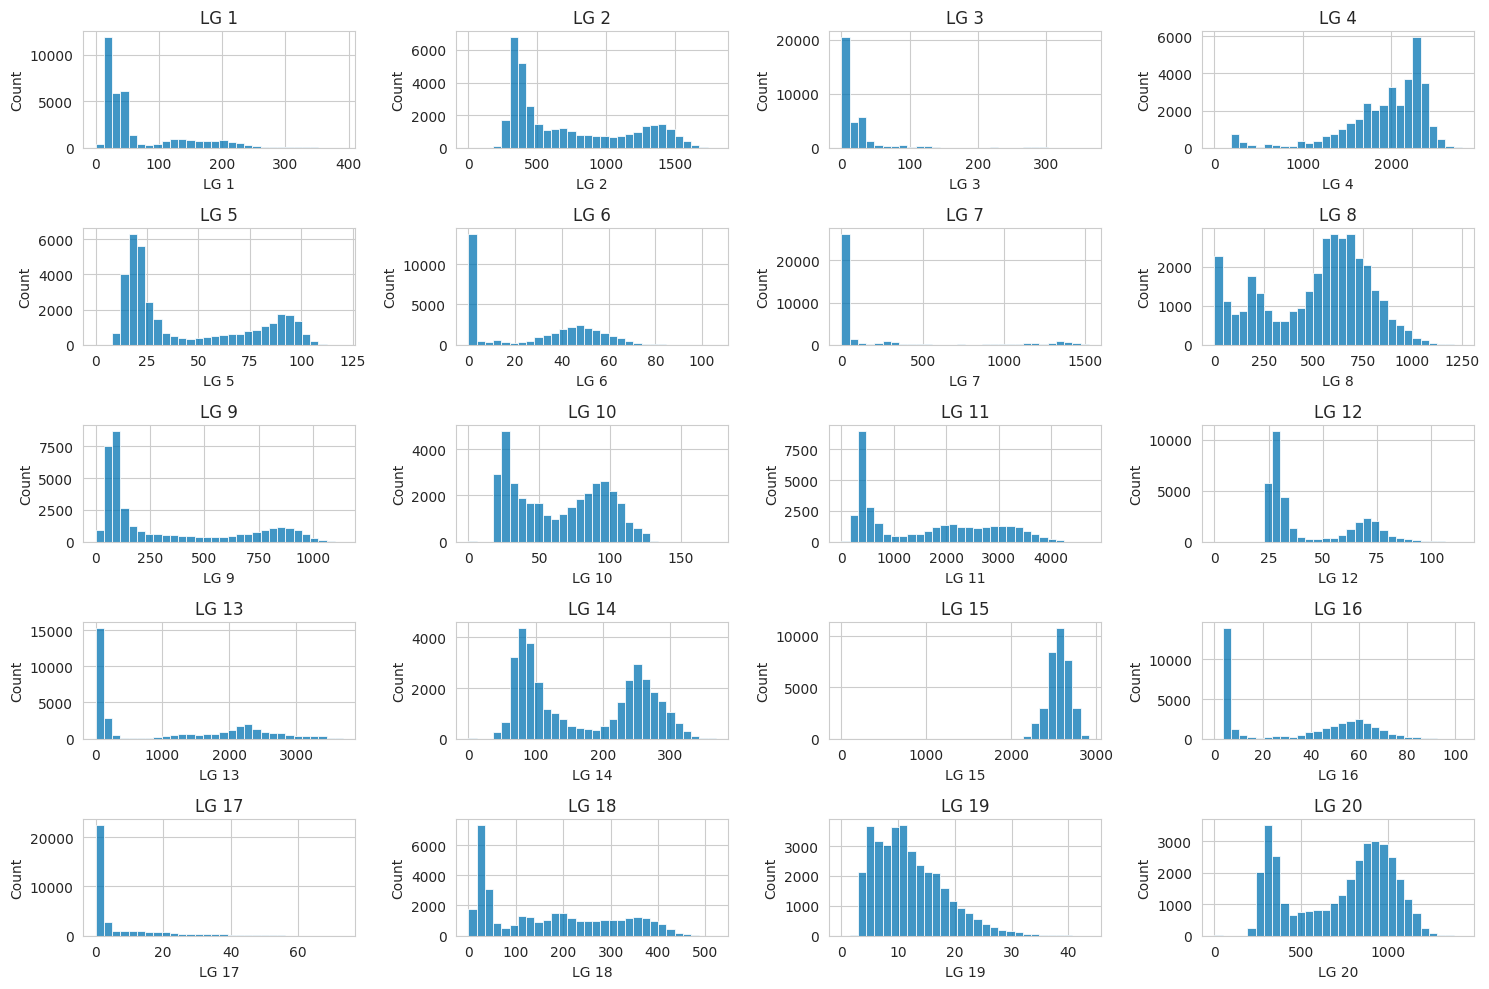

In [ ]:
plot_histogram(lp_20ips_2016)

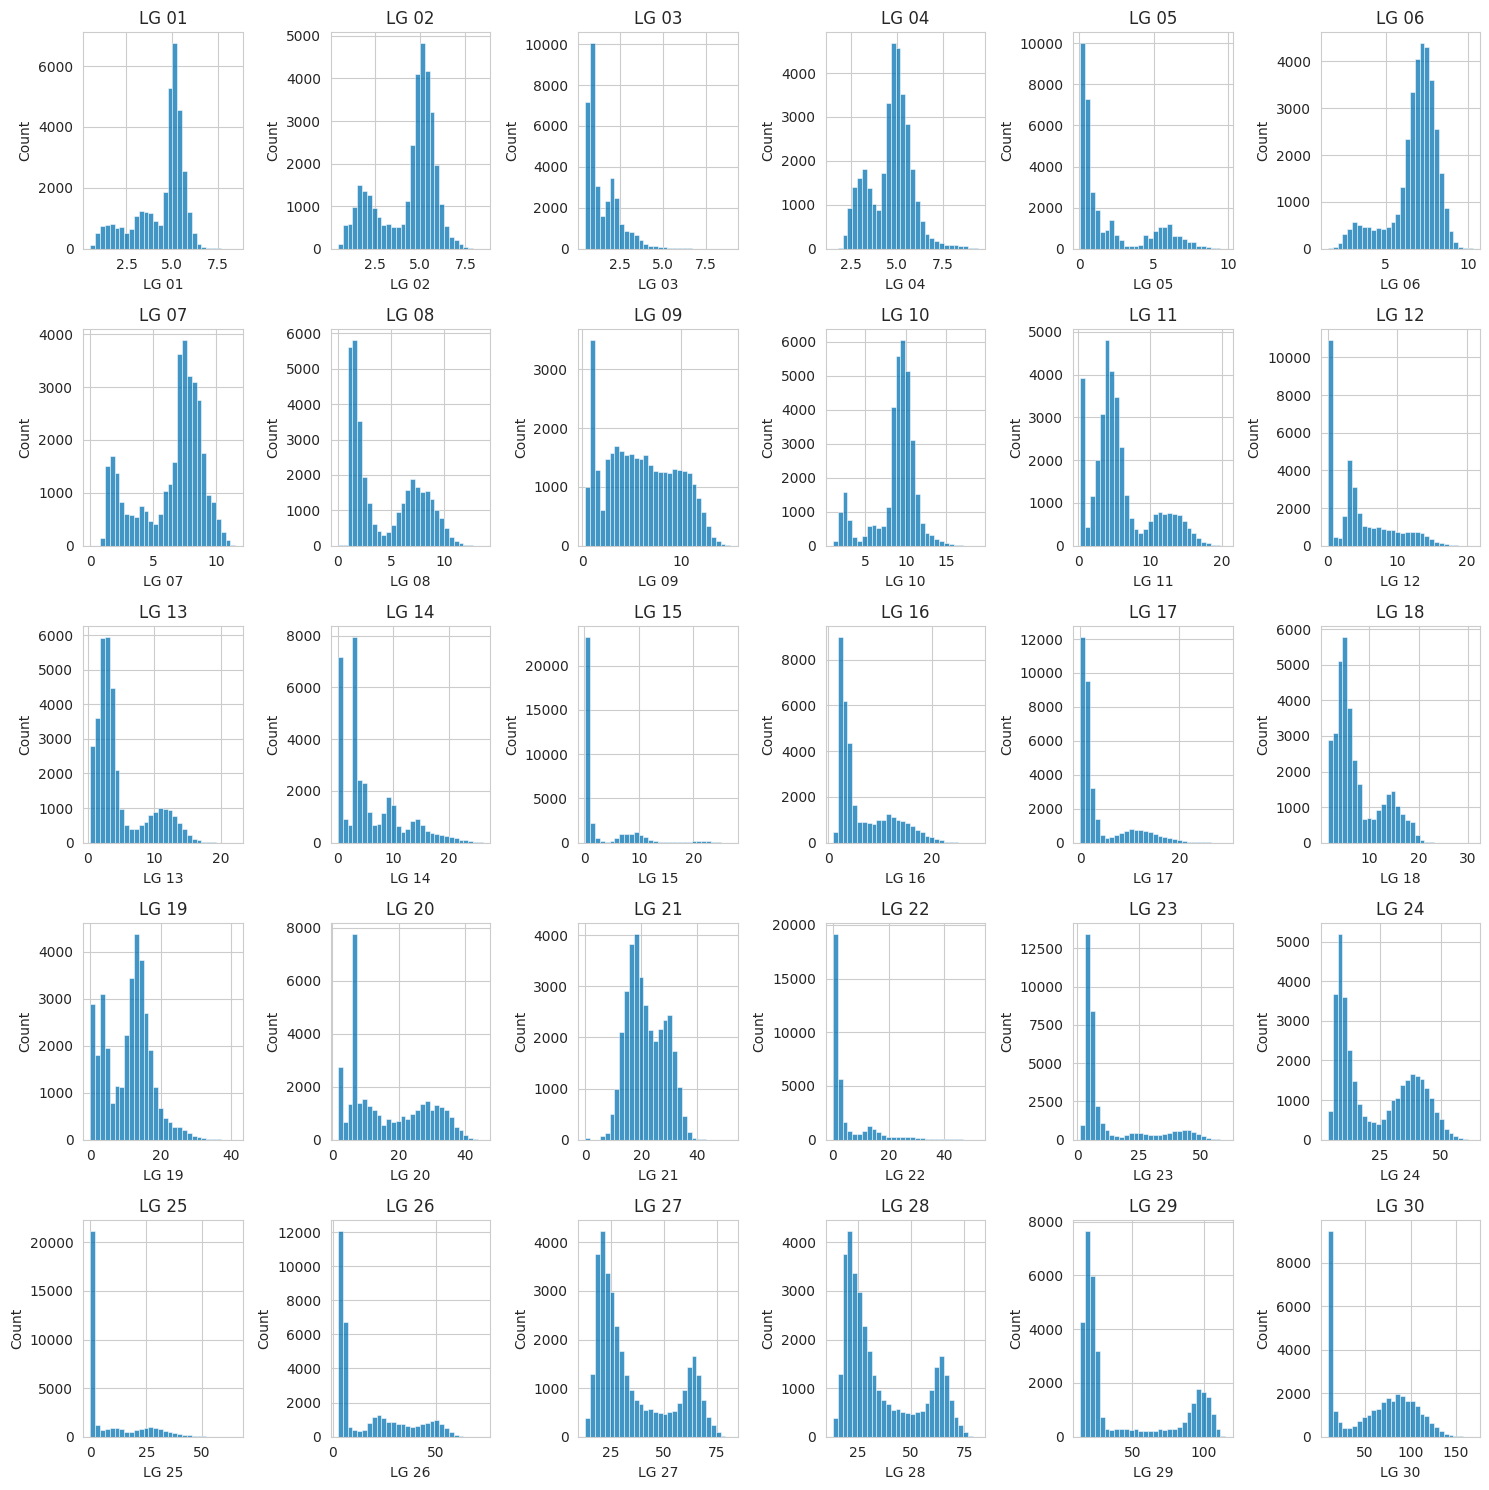

In [ ]:
plot_histogram(lp_30ups_2017)

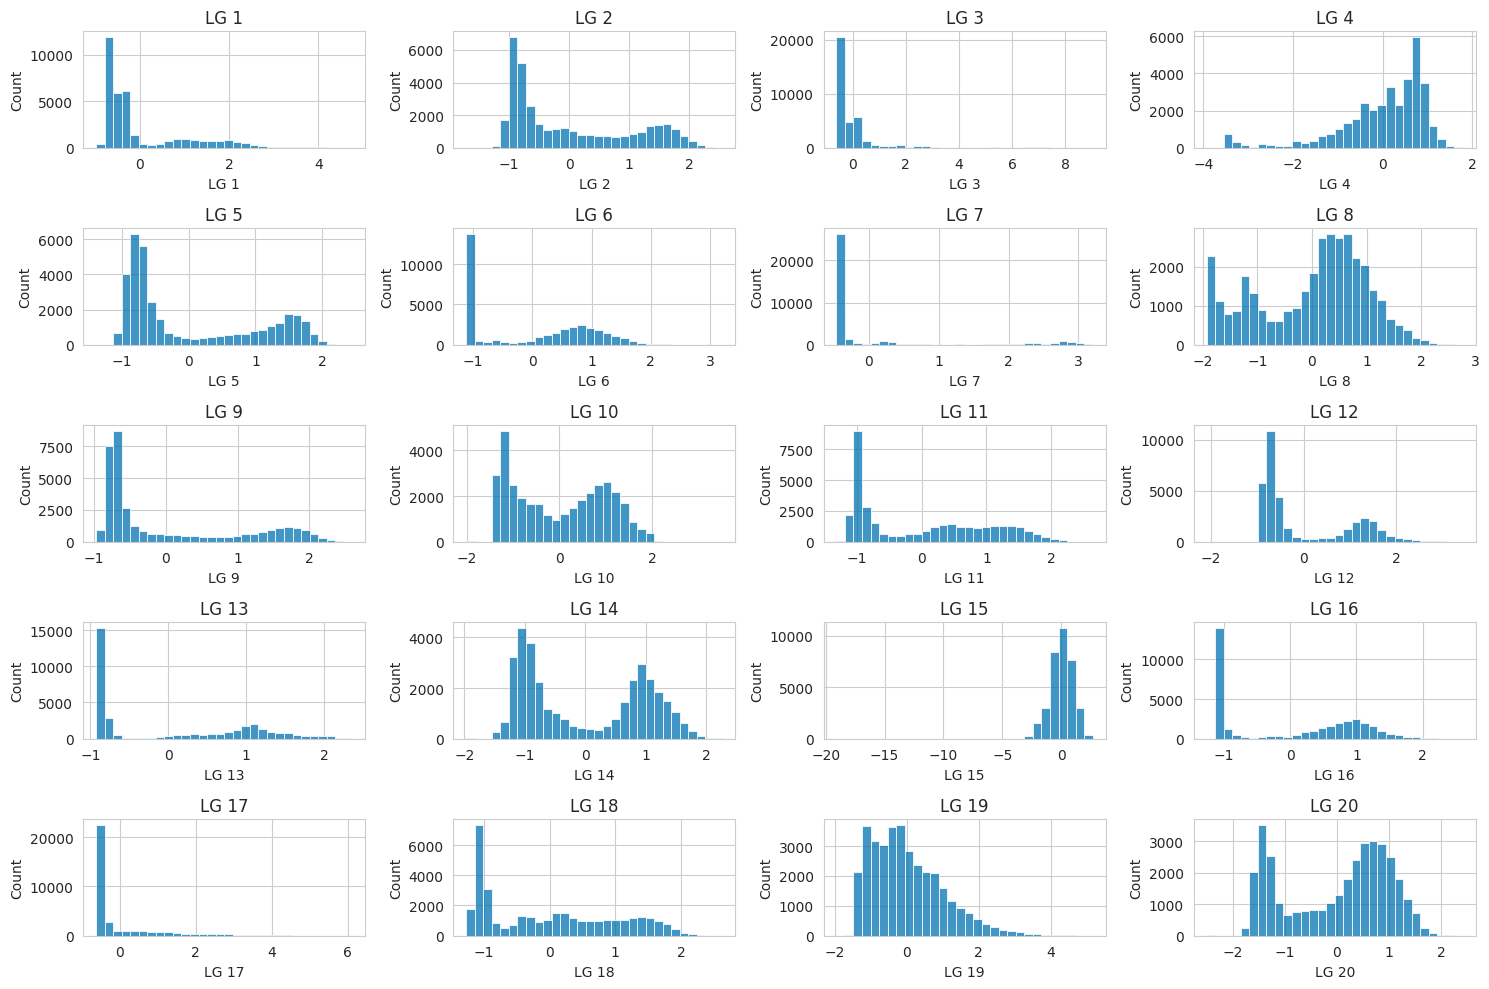

In [ ]:
lp_20ips_2016_z_norm = z_normalize(lp_20ips_2016)
plot_histogram(lp_20ips_2016_z_norm)